# EJERCICIO CLUSTER DBSCAN Y REGRESION LINEAL

- Aplicar Clustering y luego regresión al ejercicio de regresiones donde vimos qué podíamos aplicar clustering y ver la mejora de la regresión.
- Aplicar Clustering a los puntos de incidentes en el mapa de NY.
- Aplicar DBSCAN al dataset de los sensores de movimiento.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler

## EJERCICIO 1
- Aplicar Clustering y luego regresión al ejercicio de regresiones donde vimos qué podíamos aplicar clustering y ver la mejora de la regresión 

In [135]:
df = pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/FuelConsumptionCo2.csv")

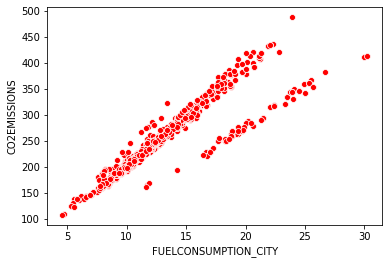

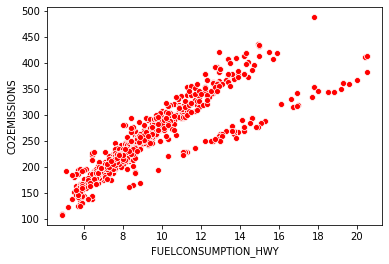

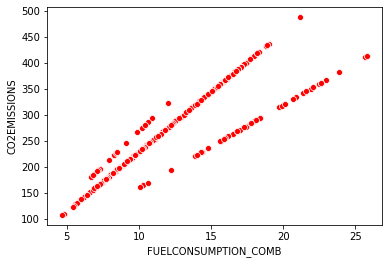

In [4]:
for i in ["FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]:
    sns.scatterplot(df[i] ,df.CO2EMISSIONS, color="r")
    plt.show()

## 1. Clusters para FUELCONSUMPTION_CITY-CO2EMISSIONS

In [72]:
from sklearn.preprocessing import StandardScaler
X=np.array(df[['FUELCONSUMPTION_CITY','CO2EMISSIONS']])
X = StandardScaler().fit_transform(X)

In [100]:
epsilon = 0.4
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

In [102]:
df2 = pd.DataFrame()
df2['FUELCONSUMPTION_CITY']= X[:,0]
df2['CO2EMISSIONS'] = X[:,1]
df2["clase"]=labels

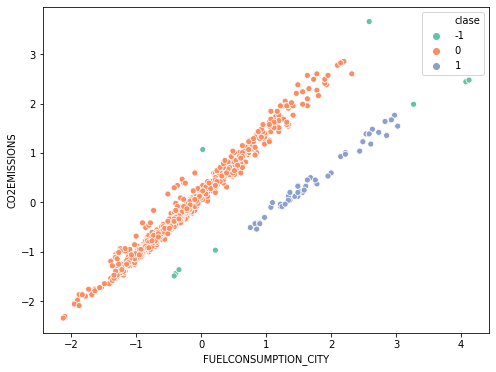

In [103]:
plt.figure(figsize=(8,6))
sns.scatterplot(df2['FUELCONSUMPTION_CITY'],df2['CO2EMISSIONS'],hue = df2["clase"], palette="Set2")
plt.show()

In [78]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

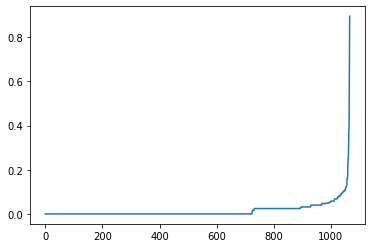

### Regresion para la clase 0:

In [115]:
from sklearn.metrics import mean_squared_error, r2_score

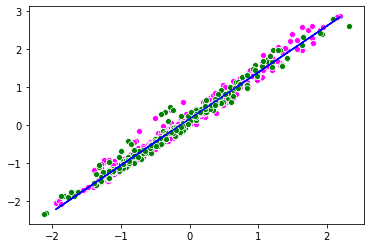

MSE:  0.019971666397088347
R2_score:  0.9782411470824968


In [116]:
df3=df2[df2["clase"]==0]
X = np.array(df3[['FUELCONSUMPTION_CITY']])
y = np.array(df3[['CO2EMISSIONS']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
plt.show()
yhat = regresion_lineal.predict(X_test)
print("MSE: ",mean_squared_error(yhat,y_test))
print("R2_score: ",r2_score(y_test,yhat))

### Regresion para la clase 1:

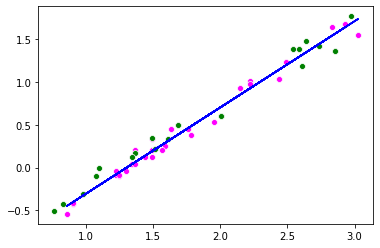

MSE:  0.01341838702316946
R2_score:  0.9675216530811184


In [117]:
df3=df2[df2["clase"]==1]
X = np.array(df3[['FUELCONSUMPTION_CITY']])
y = np.array(df3[['CO2EMISSIONS']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
plt.show()
yhat = regresion_lineal.predict(X_test)
print("MSE: ",mean_squared_error(yhat,y_test))
print("R2_score: ",r2_score(y_test,yhat))

## 2. Clusters para 'FUELCONSUMPTION_HWY'-CO2EMISSIONS

In [136]:
from sklearn.preprocessing import StandardScaler
X=np.array(df[['FUELCONSUMPTION_HWY','CO2EMISSIONS']])
X = StandardScaler().fit_transform(X)

In [176]:
epsilon = 0.3
minimumSamples = 15
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_


In [177]:
df2 = pd.DataFrame()
df2['FUELCONSUMPTION_HWY']= X[:,0]
df2['CO2EMISSIONS'] = X[:,1]
df2["clase"]=labels

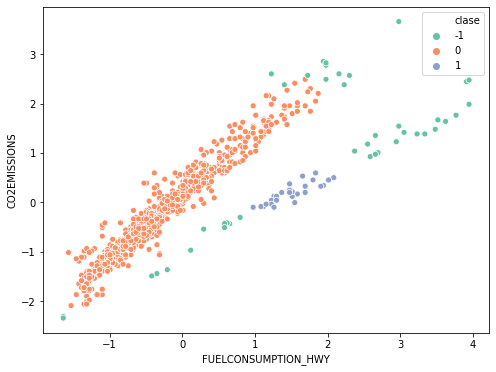

In [178]:
plt.figure(figsize=(8,6))
sns.scatterplot(df2['FUELCONSUMPTION_HWY'],df2['CO2EMISSIONS'],hue = df2["clase"], palette="Set2")
plt.show()

### Regresion para la clase 0:

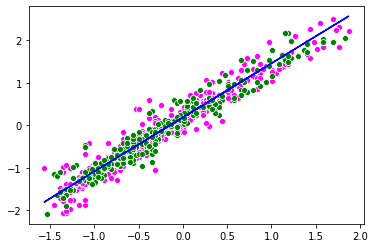

MSE:  0.049638709346443446
R2_score:  0.9433318366182211


In [180]:
df3=df2[df2["clase"]==0]
X = np.array(df3[['FUELCONSUMPTION_HWY']])
y = np.array(df3[['CO2EMISSIONS']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
plt.show()
yhat = regresion_lineal.predict(X_test)
print("MSE: ",mean_squared_error(yhat,y_test))
print("R2_score: ",r2_score(y_test,yhat))

### Regresion para la clase 1:

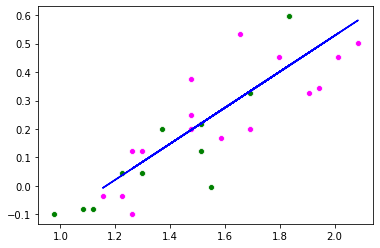

MSE:  0.014310564631368525
R2_score:  0.7964782119941772


In [181]:
df3=df2[df2["clase"]==1]
X = np.array(df3[['FUELCONSUMPTION_HWY']])
y = np.array(df3[['CO2EMISSIONS']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
plt.show()
yhat = regresion_lineal.predict(X_test)
print("MSE: ",mean_squared_error(yhat,y_test))
print("R2_score: ",r2_score(y_test,yhat))

## 3. Clusters para 'FUELCONSUMPTION_COMB'-CO2EMISSIONS

In [184]:
from sklearn.preprocessing import StandardScaler
X=np.array(df[['FUELCONSUMPTION_COMB','CO2EMISSIONS']])
X = StandardScaler().fit_transform(X)

In [197]:
epsilon = 0.5
minimumSamples = 15
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

In [198]:
df2 = pd.DataFrame()
df2['FUELCONSUMPTION_COMB']= X[:,0]
df2['CO2EMISSIONS'] = X[:,1]
df2["clase"]=labels

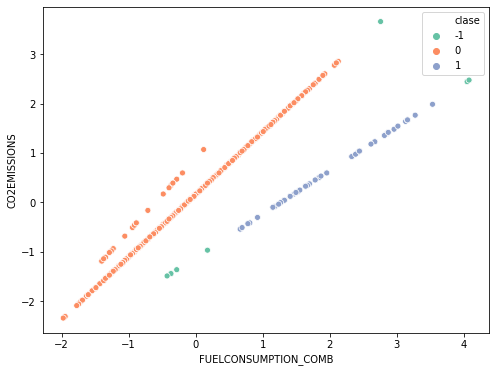

In [199]:
plt.figure(figsize=(8,6))
sns.scatterplot(df2['FUELCONSUMPTION_COMB'],df2['CO2EMISSIONS'],hue = df2["clase"], palette="Set2")
plt.show()

### Regresion para la clase 0:

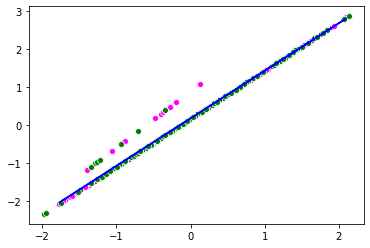

MSE:  0.006611500854379456
R2_score:  0.9936034373570644


In [200]:
df3=df2[df2["clase"]==0]
X = np.array(df3[['FUELCONSUMPTION_COMB']])
y = np.array(df3[['CO2EMISSIONS']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
plt.show()
yhat = regresion_lineal.predict(X_test)
print("MSE: ",mean_squared_error(yhat,y_test))
print("R2_score: ",r2_score(y_test,yhat))

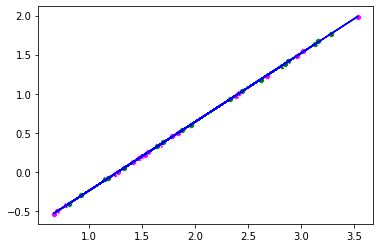

MSE:  1.985717011925461e-05
R2_score:  0.9999573813350786


In [201]:
df3=df2[df2["clase"]==1]
X = np.array(df3[['FUELCONSUMPTION_COMB']])
y = np.array(df3[['CO2EMISSIONS']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
sns.scatterplot(X_test.flatten(),y_test.flatten(), color="green") #prueba 
plt.plot(X_train, regresion_lineal.coef_[0][0]*X_train + regresion_lineal.intercept_[0], '-b')
plt.show()
yhat = regresion_lineal.predict(X_test)
print("MSE: ",mean_squared_error(yhat,y_test))
print("R2_score: ",r2_score(y_test,yhat))

## EJERCICIO 2
- Aplicar Clustering a los puntos de incidentes en el mapa de NY.

In [228]:
# Se descarga un csv con incidentes ocurridos en San Francisco
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [230]:
df_incidents["Time"]=pd.to_datetime(df_incidents['Time'], format="%H:%M")

In [242]:
horas=[]
for i in range(len(df_incidents["Time"])):
    h=df_incidents["Time"][i].strftime("%H")
    horas.append(h)
df_incidents["horas"]=horas

In [246]:
df_incidents["horas"]=df_incidents["horas"].astype("int32")

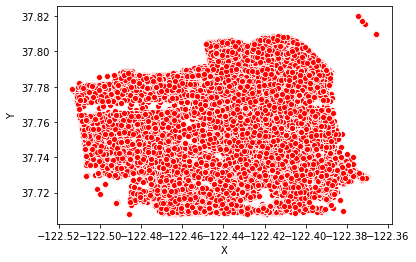

In [203]:
sns.scatterplot(df_incidents["X"] ,df_incidents["Y"], color="r")
plt.show()

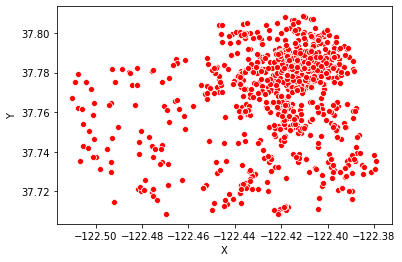

In [285]:
#Filtro por Viernes, depues de las 22:00 y Southern
df=df_incidents[(df_incidents["DayOfWeek"]=='Friday')&(df_incidents["horas"]>22)]
sns.scatterplot(df["X"] ,df["Y"], color="r")
plt.show()

In [286]:
X=np.array(df[['X','Y']])

In [287]:
epsilon = 0.004
minimumSamples = 10
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_

In [288]:
df2 = pd.DataFrame()
df2['X']= X[:,0]
df2['Y'] = X[:,1]
df2["clase"]=labels

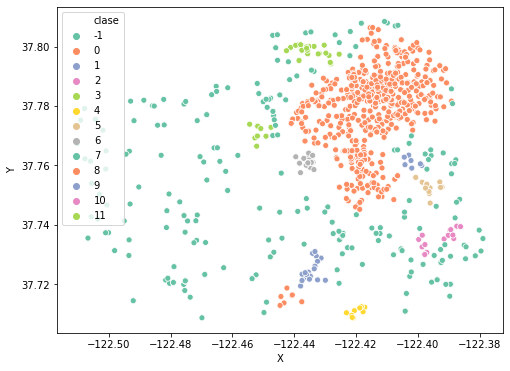

In [289]:
plt.figure(figsize=(8,6))
sns.scatterplot(df2['X'],df2['Y'],hue = df2["clase"], palette="Set2")
plt.show()

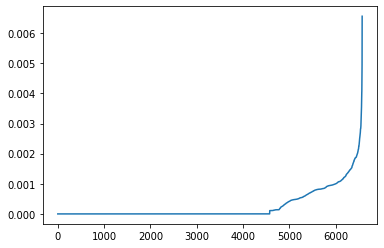

In [258]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)